# 1. The brief
Imagine working for a digital marketing agency, and the agency is approached by a massive online retailer of furniture. They want to test our skills at creating large campaigns for all of their website. We are tasked with creating a prototype set of keywords for search campaigns for their sofas section. The client says that they want us to generate keywords for the following products:

* sofas
* convertible sofas
* love seats
* recliners
* sofa beds

The brief: The client is generally a low-cost retailer, offering many promotions and discounts. We will need to focus on such keywords. We will also need to move away from luxury keywords and topics, as we are targeting price-sensitive customers. Because we are going to be tight on budget, it would be good to focus on a tightly targeted set of keywords and make sure they are all set to exact and phrase match.

Based on the brief above we will first need to generate a list of words, that together with the products given above would make for good keywords. Here are some examples:

* Products: sofas, recliners
* Words: buy, prices

The resulting keywords: 'buy sofas', 'sofas buy', 'buy recliners', 'recliners buy', 'prices sofas', 'sofas prices', 'prices recliners', 'recliners prices'.

As a final result, we want to have a DataFrame that looks like this:
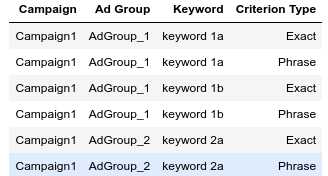

The first step is to come up with a list of words that users might use to express their desire in buying low-cost sofas.

In [1]:
# List of words to pair with products
words = ['buy', 'price', 'discount', 'promotion', 'promo', 'shop']

# Print list of words
print(words)

['buy', 'price', 'discount', 'promotion', 'promo', 'shop']


# . Combine the words with the product names
Imagining all the possible combinations of keywords can be stressful! But not for us, because we are keyword ninjas! We know how to translate campaign briefs into Python data structures and can imagine the resulting DataFrames that we need to create.

Now that we have brainstormed the words that work well with the brief that we received, it is now time to combine them with the product names to generate meaningful search keywords. We want to combine every word with every product once before, and once after, as seen in the example above.

As a quick reminder, for the product 'recliners' and the words 'buy' and 'price' for example, we would want to generate the following combinations:

buy recliners

recliners buy

price recliners

recliners price

…

and so on for all the words and products that we have.

In [2]:
products = ['sofas', 'convertible sofas', 'love seats', 'recliners', 'sofa beds']

# Create an empty list
keywords_list = []

# Loop through products
for product in products:
    # Loop through words
    for word in words:
        # Append combinations
        keywords_list.append([product, product + ' ' + word])
        keywords_list.append([product, word + ' ' + product])
        
# Inspect keyword list
from pprint import pprint
pprint(keywords_list)

[['sofas', 'sofas buy'],
 ['sofas', 'buy sofas'],
 ['sofas', 'sofas price'],
 ['sofas', 'price sofas'],
 ['sofas', 'sofas discount'],
 ['sofas', 'discount sofas'],
 ['sofas', 'sofas promotion'],
 ['sofas', 'promotion sofas'],
 ['sofas', 'sofas promo'],
 ['sofas', 'promo sofas'],
 ['sofas', 'sofas shop'],
 ['sofas', 'shop sofas'],
 ['convertible sofas', 'convertible sofas buy'],
 ['convertible sofas', 'buy convertible sofas'],
 ['convertible sofas', 'convertible sofas price'],
 ['convertible sofas', 'price convertible sofas'],
 ['convertible sofas', 'convertible sofas discount'],
 ['convertible sofas', 'discount convertible sofas'],
 ['convertible sofas', 'convertible sofas promotion'],
 ['convertible sofas', 'promotion convertible sofas'],
 ['convertible sofas', 'convertible sofas promo'],
 ['convertible sofas', 'promo convertible sofas'],
 ['convertible sofas', 'convertible sofas shop'],
 ['convertible sofas', 'shop convertible sofas'],
 ['love seats', 'love seats buy'],
 ['love seats

# 3. Convert the list of lists into a DataFrame
Now we want to convert this list of lists into a DataFrame so we can easily manipulate it and manage the final output.

In [3]:
# Load library
import pandas as pd

# Create a DataFrame from list
keywords_df = pd.DataFrame.from_records(keywords_list)

# Print the keywords DataFrame to explore it
print(keywords_df)

                    0                            1
0               sofas                    sofas buy
1               sofas                    buy sofas
2               sofas                  sofas price
3               sofas                  price sofas
4               sofas               sofas discount
5               sofas               discount sofas
6               sofas              sofas promotion
7               sofas              promotion sofas
8               sofas                  sofas promo
9               sofas                  promo sofas
10              sofas                   sofas shop
11              sofas                   shop sofas
12  convertible sofas        convertible sofas buy
13  convertible sofas        buy convertible sofas
14  convertible sofas      convertible sofas price
15  convertible sofas      price convertible sofas
16  convertible sofas   convertible sofas discount
17  convertible sofas   discount convertible sofas
18  convertible sofas  converti

# 4. Rename the columns of the DataFrame
Before we can upload this table of keywords, we will need to give the columns meaningful names. If we inspect the DataFrame we just created above, we can see that the columns are currently named 0 and 1. Ad Group (example: "sofas") and Keyword (example: "sofas buy") are much more appropriate names.

In [4]:
# Rename the columns of the DataFrame
keywords_df = keywords_df.rename(columns={0: 'Ad Group', 1: 'Keyword'})

# 5. Add a campaign column
Now we need to add some additional information to our DataFrame. We need a new column called Campaign for the campaign name. We want campaign names to be descriptive of our group of keywords and products, so let's call this campaign 'SEM_Sofas'.

In [5]:
# Add a campaign column
keywords_df['Campaign'] = 'SEM_Sofas'

# 6. Create the match type column
There are different keyword match types. One is exact match, which is for matching the exact term or are close variations of that exact term. Another match type is broad match, which means ads may show on searches that include misspellings, synonyms, related searches, and other relevant variations.

Straight from Google's AdWords documentation:

In general, the broader the match type, the more traffic potential that keyword will have, since your ads may be triggered more often. Conversely, a narrower match type means that your ads may show less often—but when they do, they’re likely to be more related to someone’s search.

Since the client is tight on budget, we want to make sure all the keywords are in exact match at the beginning.

In [6]:
# Add a criterion type column
keywords_df['Criterion Type'] = 'Exact'

# 7. Duplicate all the keywords into 'phrase' match
The great thing about exact match is that it is very specific, and we can control the process very well. The tradeoff, however, is that:

1.The search volume for exact match is lower than other match types

2.We can't possibly think of all the ways in which people search, and so, we are probably missing out on some high-quality keywords.

So it's good to use another match called phrase match as a discovery mechanism to allow our ads to be triggered by keywords that include our exact match keywords, together with anything before (or after) them.

Later on, when we launch the campaign, we can explore with modified broad match, broad match, and negative match types, for better visibility and control of our campaigns.

In [7]:
# Make a copy of the keywords DataFrame
keywords_phrase = keywords_df.copy()

# Change criterion type match to phrase
keywords_phrase['Criterion Type'] = 'Phrase'

# Append the DataFrames
keywords_df_final = keywords_df.append(keywords_phrase)

# 8. Save and summarize!
To upload our campaign, we need to save it as a CSV file. Then we will be able to import it to AdWords editor or BingAds editor. There is also the option of pasting the data into the editor if we want, but having easy access to the saved data is great so let's save to a CSV file!

Looking at a summary of our campaign structure is good now that we've wrapped up our keyword work. We can do that by grouping by ad group and criterion type and counting by keyword. This summary shows us that we assigned specific keywords to specific ad groups, which are each part of a campaign. In essence, we are telling Google (or Bing, etc.) that we want any of the words in each ad group to trigger one of the ads in the same ad group. Separately, we will have to create another table for ads, which is a task for another day and would look something like this:
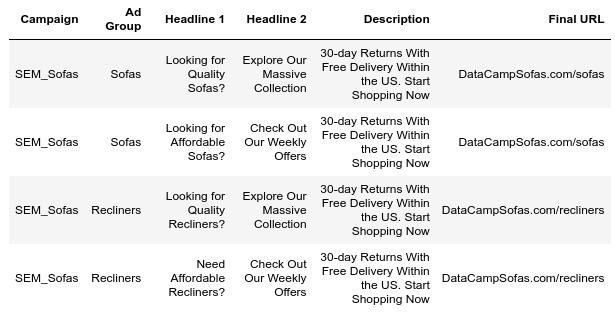
Together, these tables get us the sample keywords -> ads -> landing pages mapping shown in the diagram below.
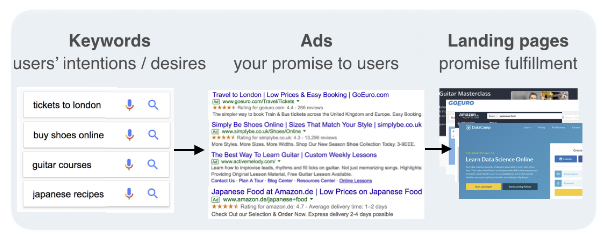


In [8]:
# Save the final keywords to a CSV file
keywords_df_final.to_csv('keywords.csv', index=False)

# View a summary of our campaign work
summary = keywords_df_final.groupby(['Ad Group', 'Criterion Type'])['Keyword'].count()
print(summary)

Ad Group           Criterion Type
convertible sofas  Exact             12
                   Phrase            12
love seats         Exact             12
                   Phrase            12
recliners          Exact             12
                   Phrase            12
sofa beds          Exact             12
                   Phrase            12
sofas              Exact             12
                   Phrase            12
Name: Keyword, dtype: int64
